🧠 Diabetes Prediction Using Logistic Regression

This notebook explains how to use Logistic Regression to predict diabetes using the PIMA Indian Diabetes dataset. It includes preprocessing, visualization, modeling, and prediction.

📥 Step 1: Import Required Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle


📊 Step 2: Load and Explore the Dataset



In [2]:
data=pd.read_csv("/Users/omgajipara/Desktop/Data Science/Projects/Diabetes/Diabetes.csv")
data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
print(data.info())
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

📈 Step 3: Data Visualization



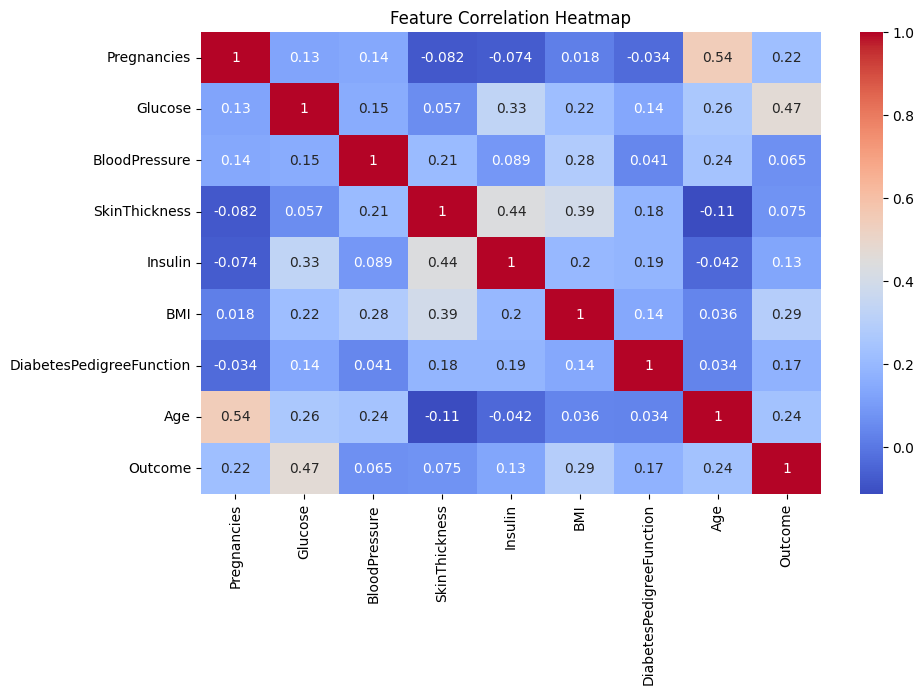

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


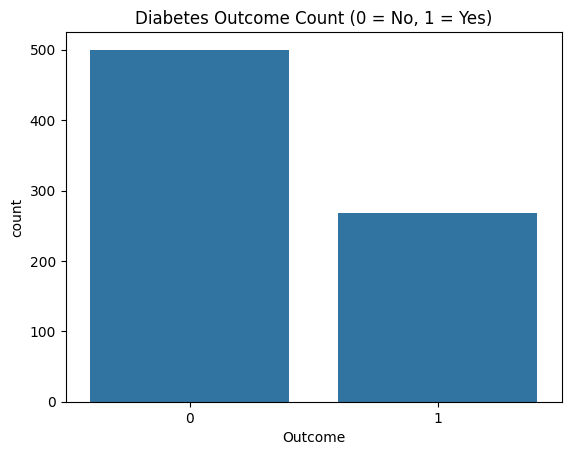

In [5]:
sns.countplot(x='Outcome', data=data)
plt.title('Diabetes Outcome Count (0 = No, 1 = Yes)')
plt.show()

⚙️ Step 4: Preprocess Data



In [6]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


🧪 Step 5: Best Random State for Highest Accuracy



In [7]:
best_score = 0
best_state = 0

for state in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=state)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    if acc > best_score:
        best_score = acc
        best_state = state

print(f"Best Accuracy: {best_score:.4f} at random_state = {best_state}")


Best Accuracy: 0.8442 at random_state = 57


📌 Step 6: Final Training & Evaluation



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=best_state)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8441558441558441
Confusion Matrix:
 [[96  9]
 [15 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89       105
           1       0.79      0.69      0.74        49

    accuracy                           0.84       154
   macro avg       0.83      0.80      0.81       154
weighted avg       0.84      0.84      0.84       154



🔢 Step 7: Predict on New Data



In [9]:
import pandas as pd

new_data = [[1, 85, 66, 29, 0, 26.6, 0.351, 31]]
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

new_data_df = pd.DataFrame(new_data, columns=columns)

new_data_scaled = scaler.transform(new_data_df)
prediction = model.predict(new_data_scaled)
if prediction==0:
    print("Predicted outcome (0=No Diabetes, 1=Diabetes):", prediction,"No Diabetes")
else:
    print("Predicted outcome (0=No Diabetes, 1=Diabetes):", prediction,"Diabetes")


Predicted outcome (0=No Diabetes, 1=Diabetes): [0] No Diabetes


In [10]:
data.iloc[1]

Pregnancies                  1.000
Glucose                     85.000
BloodPressure               66.000
SkinThickness               29.000
Insulin                      0.000
BMI                         26.600
DiabetesPedigreeFunction     0.351
Age                         31.000
Outcome                      0.000
Name: 1, dtype: float64

💾 Step 8: Save and Reload Model



In [11]:
# Save
with open("/Users/omgajipara/Desktop/Data Science/TrainedModels/Diabetes/Diabetes_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("/Users/omgajipara/Desktop/Data Science/TrainedModels/Diabetes/Diabetes_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)



# Load
with open("/Users/omgajipara/Desktop/Data Science/TrainedModels/Diabetes/Diabetes_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("/Users/omgajipara/Desktop/Data Science/TrainedModels/Diabetes/Diabetes_scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Predict again
new_input = [[2, 130, 70, 25, 100, 28.0, 0.5, 35]]
new_input_scaled = scaler.transform(new_input)
print("Prediction:", model.predict(new_input_scaled)[0])


In [12]:
'''from sklearn.preprocessing import StandardScaler

X = data.drop('Outcome', axis=1)
y = data['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=57)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
'''

'from sklearn.preprocessing import StandardScaler\n\nX = data.drop(\'Outcome\', axis=1)\ny = data[\'Outcome\']\n\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=57)\n\nfrom sklearn.linear_model import LogisticRegression\n\nmodel = LogisticRegression()\nmodel.fit(X_train, y_train)\n\n\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\n\ny_pred = model.predict(X_test)\n\nprint("Accuracy:", accuracy_score(y_test, y_pred))\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test, y_pred))\n'